In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io, color
from skimage.transform import resize
import math


https://github.com/laixintao/slic-python-implementation/blob/master/slic.py
https://github.com/darshitajain/SLIC/blob/master/SLIC_Algorithm.ipynb

In [2]:
from utils.slic import SLICProcessor

In [3]:
img_dir = "./data/sample.jpg"
p = SLICProcessor(img_dir, 16, 40)
p.iterate_10times()
# p = SLICProcessor('Lenna.png', 300, 40)
# p.iterate_10times()
# p = SLICProcessor('Lenna.png', 500, 40)
# p.iterate_10times()
# p = SLICProcessor('Lenna.png', 1000, 40)
# p.iterate_10times()
# p = SLICProcessor('Lenna.png', 200, 5)
# p.iterate_10times()
# p = SLICProcessor('Lenna.png', 300, 5)
# p.iterate_10times()
# p = SLICProcessor('Lenna.png', 500, 5)
# p.iterate_10times()
# p = SLICProcessor('Lenna.png', 1000, 5)
# p.iterate_10times()

100%|██████████| 10/10 [03:12<00:00, 19.27s/it]


In [4]:
def get_df_rgb(img, sample_size=2000):
    image = img
    if isinstance(img, str):
        image = Image.open(img)
    
    n_dims = np.array(image).shape[-1]
    r, g, b = np.array(image).reshape(-1, n_dims).T
    # return pd.DataFrame({'r': r, 'g': g, 'b': b}).sample(n=sample_size)
    return pd.DataFrame({'r': r, 'g': g, 'b': b})
    

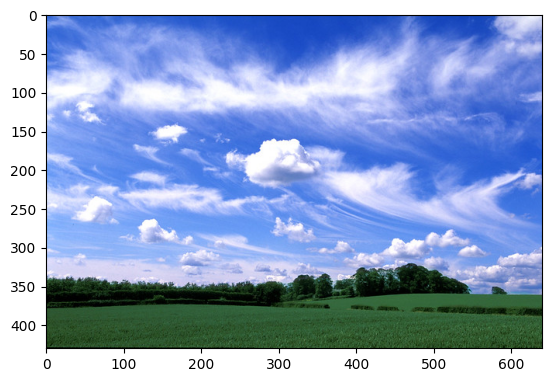

(275200, 3)


In [100]:
img_dir = './data/sample2.jpg'
File_name = mpimg.imread(img_dir)
plt.imshow(File_name)
plt.show()

# plt.imshow(image)
# image.show()
rgb_values = get_df_rgb(File_name)
print(rgb_values.shape)

In [101]:
rgb_array = rgb_values.values

# Initialize the PCA model with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to your data
pca.fit(rgb_array)

# Transform the RGB values to the first two principal components
pca_components = pca.transform(rgb_array)


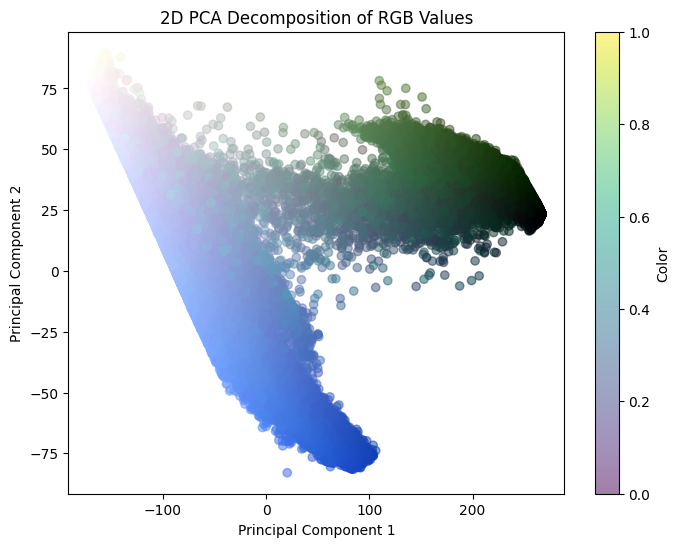

In [102]:
# Create a DataFrame for the transformed PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Plot the 2D PCA decomposition with colored points
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=rgb_array/255.0, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Decomposition of RGB Values')
plt.colorbar(label='Color')
plt.show()

In [103]:
from sklearn.cluster import KMeans

palette_size = 5
model = KMeans(n_clusters=palette_size)
clusters = model.fit_predict(rgb_values)

palette = model.cluster_centers_.astype(int).tolist()

/Users/hunkim/anaconda3/envs/gan/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [104]:
ndArray = np.array(palette, dtype=np.float32)
outImg = Image.fromarray(ndArray)
# outImg.save('./image.jpg')
print(ndArray)


[[109. 144. 231.]
 [ 38.  73.  40.]
 [161. 181. 243.]
 [ 55. 101. 209.]
 [220. 224. 251.]]


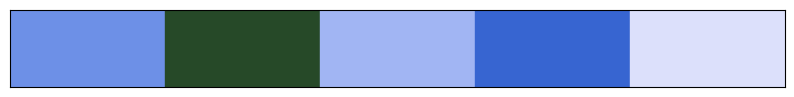

In [105]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 1))

# Set axis limits
ax.set_xlim(0, len(palette))
ax.set_ylim(0, 1)

# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])

# Create colored squares for each RGB value
for i, rgb in enumerate(palette):
    color = [comp / 255.0 for comp in rgb]  # Normalize to [0, 1] range
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))

# Display the color row
plt.show()